In [15]:
# imports
import pandas as pd
import numpy as np
import pickle

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# loading the data

# river_isouptree
with open("results/river_isouptree_additional.pkl", "rb") as f:
    re_isoup = pickle.load(f)


# river_st_general (still working)
with open("results/river_st_general.pkl", "rb") as f:
    re_sg = pickle.load(f)

with open("results/river_st_general_additional.pkl", "rb") as f:
    re_sga = pickle.load(f)

    

# sklearn_general (still working)
with open("results/sklearn_general.pkl", "rb") as f:
    re_bg = pickle.load(f)
    
with open("results/sklearn_general_additional.pkl", "rb") as f:
    re_bga = pickle.load(f)


In [17]:
methods_b = [
    #'LinReg',
    #'DT',
    #'RF',
    #'GBT',
    #'MLP'
]

methods_s = [    
    'KNN',
    'HT',
    'HAT',
    'ARF'
]

methods_i = [
    'iSOUPTree'
]

sensors = [1, 24, 35, 43, 68, 106, 109, 110, 116, 117, 122, 124, 144, 145, 157, 168, 177,
    179, 223, 225, 236, 239, 245, 249, 253, 257, 259, 262, 285, 286, 290, 293, 301, 303, 312, 358, 359,
    365, 367, 377, 378, 379, 382, 384, 385, 388, 389, 391, 392, 394, 395]
horizons = [ 0.25, 0.5, 0.75, 1, 3, 6, 12, 24, 36, 106, 112, 118, 124, 1024 ]

In [18]:
# merge standard and additional results
for item in re_sga:
    re_sg.append(item)

for item in re_bga:
    re_bg.append(item)

In [20]:
# general features

# packing single-target results into JSON structure
def add_results_st(d, methods, re, prefix=''):
    
    for m in methods:
        d[prefix + m] = []
        for s in sensors:
            # list all records
            data = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re))
            values = []            
            for i in range(len(data)):
                val = data[i]['r208'][-1]
                if (val > -10):
                    values.append(val)            
            d[prefix + m].append(np.mean(values))            
            
    return d

def add_results_st_b(d, methods, re, prefix=''):
    for m in methods:
        d[prefix + m] = []
        for s in sensors:
            # list all records
            data = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re))
            values = []
            for i in range(len(data)):
                val = np.mean(data[i]['r2'][40:50])
                if (val > -10):
                    values.append(val)            
            d[prefix + m].append(np.mean(values))            
            
    return d
    
    
# packing results in a dataframe
def pack_results():
    # get R2 for iSOUPTree
    isouptree_r = []
    isouptree_r2 = []
    for s in sensors:
        data = list(filter(lambda x: x['sensor'] == s, re_isoup))[0]        
        isouptree_r.append(data['r208'][-1])
        isouptree_r2.append(data['r2'][-1])
    
    d = { 'sensors': sensors, 'iSOUPTree': isouptree_r}    
    
    # get R2 for single target streaming
    d = add_results_st(d, methods_s, re_sg)    
    
    # get R2 for single target batch
    d = add_results_st_b(d, methods_b, re_bg, "batch ")
        
    rdf = pd.DataFrame(data = d)
    return rdf
    
grdf = pack_results()

#grdf.iloc[5, grdf.columns.get_loc("batch LinReg")] = 0.6

grdf

,sensors,iSOUPTree,KNN,HT,HAT,ARF
0,1,0.674317,0.414472,0.643240,0.547976,0.682638
1,24,0.806962,0.796774,0.801047,0.776126,0.852637
2,35,0.913750,0.888819,0.892925,0.882592,0.921372
3,43,0.617539,0.575923,0.646865,0.598429,0.705915
4,68,0.611477,0.498083,0.587937,0.513706,0.720365
5,106,0.632764,0.487741,0.645812,0.545843,0.698233
6,109,0.666498,0.640090,0.678340,0.664181,0.799636
7,110,0.937515,0.891628,0.886592,0.894455,0.908325
8,116,0.741534,0.676671,0.740418,0.738875,0.743631
9,117,0.699432,0.722215,0.731326,0.723226,0.848560


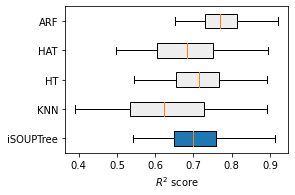

In [28]:
#grdf.pop("sensors")
# visualize
fig = plt.figure(figsize=(4, 2.7))
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
bp = plt.boxplot(grdf, showfliers=False, vert=False, patch_artist=True)
for i in range(4):
    bp['boxes'][i+1].set(facecolor="#eeeeee")
ax.set_yticklabels(grdf.columns)
ax.set_xlabel("$R^2$ score")
plt.savefig("general_features_hierarchical_comparison.pdf", bbox_inches="tight")
plt.show()

In [7]:
grdf.describe()

,iSOUPTree,KNN,HT,HAT,ARF,batch LinReg,batch DT,batch RF,batch GBT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.718540,0.635472,0.716912,0.682970,0.772154,0.548929,0.569105,0.730039,0.717643
std,0.102507,0.132537,0.088890,0.108365,0.077370,0.110301,0.231250,0.175657,0.155813
min,0.541991,0.390722,0.544223,0.496361,0.524875,0.213117,-0.126785,0.014801,0.059859
25%,0.649423,0.533612,0.653280,0.604661,0.729594,0.498916,0.519277,0.661604,0.661013
50%,0.699432,0.623749,0.713406,0.683111,0.769611,0.573170,0.604065,0.775025,0.750524
75%,0.758251,0.727724,0.766346,0.752236,0.813151,0.611062,0.699228,0.824150,0.809614
max,0.945259,0.891628,0.892925,0.894455,0.921372,0.800496,0.924086,0.953148,0.940346


In [139]:
# compare time series
s = 391
data_i = list(filter(lambda x: x['sensor'] == s, re_isoup))[0]["r2"]

In [200]:
len(data_sx)

9

In [202]:
# not finished 

m = 'HT'
data_sx = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re_sp))
# average over horizons
data_s = []
summa = 0
n = 0

i = 0
for val in data_sx[0]["r2"]:
    # print(val)
    summa = 0
    for e in data_sx:
        summa = summa + e["r2"][i]

    i = i + 1
    print(i, summa/9)
    
m = 'DT'
data_bx = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re_bp))[0]["r2"]
data_b = []
summa = 0
n = 0
for val in data_bx:
    i = i + 1
    summa = summa + val
    avg = summa/i
    data_b.append(avg)
    

1 0.3579671952009298
2 0.41659047311926867
3 0.48836797925473463
4 0.5227628345428423
5 0.5165852504006551
6 0.5279128328597401
7 0.5499954952527605
8 0.5657290062466285
9 0.5915735472782624
10 0.6167581155873586
11 0.6371504300258606
12 0.6465388450298627
13 0.6723956081355599
14 0.688574927379482
15 0.7049858338822479
16 0.7133204827156031
17 0.7143776328560969
18 0.7207152281117841
19 0.7220809358965831
20 0.7275407270414032
21 0.7283683715741778
22 0.733598716646483
23 0.7261017755905419
24 0.7252828495091665
25 0.72351084609086
26 0.7216375158755249
27 0.7210194507145464
28 0.7202141428671022
29 0.7155927194052681
30 0.714312629805405
31 0.716403036405739
32 0.7149194682946758
33 0.717974795154531
34 0.7213763768752186
35 0.7245837914106793
36 0.7265456616995374
37 0.7265929336981226
38 0.7291067940340331
39 0.733304631292977
40 0.7384976565992456
41 0.7431535525653149
42 0.7472735358775877
43 0.7500268078958585
44 0.7522925266822006
45 0.7537138791319623
46 0.7535667890605051
47 

IndexError: list index out of range

In [195]:
list(filter(lambda x: x['sensor'] == s and x['model'] == m, re_bp))[1]

{'sensor': 391,
 'horizon': 0.5,
 'model': 'DT',
 'mape': [0.14386554391412246,
  0.1267616065747347,
  0.09635001439655959,
  0.09876450681313921,
  0.07559752488724836,
  0.07730764549861671,
  0.08494135079849445,
  0.07568507829754625,
  0.07829222350474341,
  0.08214550327332985,
  5.048009312864759e+17,
  0.1053153366692909,
  0.06773025109230683,
  0.08134536770367319,
  0.05909077053929449,
  0.07697286857605054,
  0.060706368483641304,
  0.06857612325660184,
  0.06782716912061745,
  0.07202934536851788,
  0.06494398900925268,
  0.07818848161506337,
  0.06863647940069072,
  0.0729656882283075,
  0.074819251948385,
  0.07835600475889704,
  0.08352720573208129,
  0.11615661019209013,
  0.06749866941348921,
  0.06967400756959244,
  0.06859230166614544,
  0.06704321862421143,
  0.06713315293563593,
  0.07559710455033855,
  0.07018876960462733,
  0.08294419538396763,
  0.0559450011437524,
  0.0634824454410483,
  0.06189194186338164,
  0.05963808794561338,
  0.0585314412788577,
  0.0

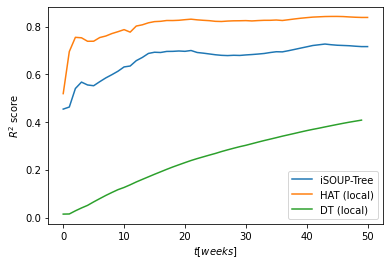

In [160]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)

ax.plot(data_i, label="iSOUP-Tree")
ax.plot(data_s, label="HAT (local)")
ax.plot(data_b, label="DT (local)")

ax.set_ylabel("$R^2$ score")
ax.set_xlabel("$t [weeks]$")
plt.legend()
#plt.savefig("local_features_comparison.pdf", bbox_inches="tight")
plt.show()



In [45]:
from autorank import autorank, plot_stats, create_report, latex_table

ModuleNotFoundError: No module named 'autorank'

In [11]:
# import sys
# !{sys.executable} -m pip install autorank
grdf.pop("sensors")

0       1
1      24
2      35
3      43
4      68
5     106
6     109
7     110
8     116
9     117
10    122
11    124
12    144
13    145
14    157
15    168
16    177
17    179
18    223
19    225
20    236
21    239
22    245
23    249
24    253
25    257
26    259
27    262
28    285
29    286
30    290
31    293
32    301
33    303
34    312
35    358
36    359
37    365
38    367
39    377
40    378
41    379
42    382
43    384
44    385
45    388
46    389
47    391
48    392
49    394
50    395
Name: sensors, dtype: int64

In [6]:
from autorank import autorank, plot_stats, create_report, latex_table

In [7]:
try:   
    grdf.pop("batch LinReg")
    grdf.pop("batch DT")
    grdf.pop("batch GBT")
    grdf.pop("batch RF")
    # grdf.pop("sensors")
except:
    print("No 'sensors' field.")
    
data = pd.DataFrame()

for a in grdf:
    for i in grdf[a]:
        data[a] = i

In [12]:
result = autorank(grdf, alpha=0.05)

In [9]:
result

RankResult(rankdf=           meanrank      median       mad  ci_lower  ci_upper effect_size  \
KNN        5.686275    0.623749  0.095625  0.531463  0.748275         0.0   
HAT        4.764706    0.683111  0.072218  0.598429  0.757235   -0.472528   
iSOUPTree  3.725490    0.699432  0.057993  0.644802  0.806962   -0.645518   
HT         3.588235    0.713406  0.059133  0.652288  0.784462   -0.760647   
ARF        2.235294    0.769611  0.040661   0.72895  0.841545   -1.338969   
sensors    1.000000  257.000000     112.0       144       378   -2.183487   

            magnitude  
KNN        negligible  
HAT             small  
iSOUPTree      medium  
HT             medium  
ARF             large  
sensors         large  , pvalue=5.027651127441518e-43, cd=1.0557432681050403, omnibus='friedman', posthoc='nemenyi', all_normal=False, pvals_shapiro=[0.15323053300380707, 0.34674695134162903, 0.0026942051481455564, 0.22474533319473267, 0.0222880020737648, 0.0734594538807869], homoscedastic=False, 

In [61]:
result_bayesian = autorank(grdf, alpha=0.05, approach='bayesian')

In [62]:
create_report(result)

The statistical analysis was conducted for 9 populations with 51 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations iSOUPTree (p=0.000), batch RF (p=0.000), and ARF (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=1.682 of the Nemenyi test.
We reject the null hypothesis (p=0.000) of the Fr

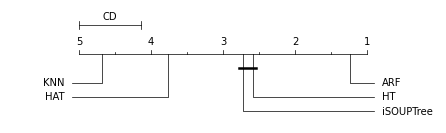

In [14]:
plot_stats(result)
plt.savefig("autorank.pdf", bbox_inches="tight")
plt.show()

In [15]:
result

RankResult(rankdf=           meanrank      mean       std  ci_lower  ci_upper effect_size  \
KNN        4.686275  0.635472  0.132537  0.585775  0.685169         0.0   
HAT        3.764706  0.682970  0.108365  0.642337  0.723603   -0.392364   
iSOUPTree  2.725490  0.718540  0.102507  0.680103  0.756977   -0.701129   
HT         2.588235  0.716912  0.088890  0.683581  0.750243   -0.721706   
ARF        1.235294  0.772154  0.077370  0.743143  0.801165   -1.259537   

            magnitude  
KNN        negligible  
HAT             small  
iSOUPTree      medium  
HT             medium  
ARF             large  , pvalue=6.021824348990433e-29, cd=0.8540919317538893, omnibus='friedman', posthoc='nemenyi', all_normal=True, pvals_shapiro=[0.22474533319473267, 0.0222880020737648, 0.0734594538807869, 0.34674695134162903, 0.15323053300380707], homoscedastic=False, pval_homogeneity=0.002426920715777303, homogeneity_test='bartlett', alpha=0.05, alpha_normality=0.01, num_samples=51, posterior_matrix=No